# Impoting data using API

first calles 5000 data but visualization was not posible because data exceed 2^16 dimetion after tening dataframe to series then again to dataframe in df7
then tried 500 same problem occured so 50 rows of data is called

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b9ccee9d-90e5-4022-aab2-d2a3b609eb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-13T09:57:42.671Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 10318}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11840, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [55]:
type(data)

dict

# Byutify the data

In [56]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [57]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11840,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19795412.00000,19795412.00000,False,NaN,1,NaN,NaN,NaN,2024-12-13T09:55:00.000Z,100154.58565,68571689760.09025,-14.01660,-0.09713,-0.81546,1.80723,14.51000,54.53263,66.76799,1982601286669.44629,55.16540,2103246298690.75000,NaN,2024-12-13T09:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.404944
1,1027,Ethereum,ETH,ethereum,9673,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120445820.12880,120445820.12880,True,NaN,2,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,3889.66449,41405668734.18529,13.08670,-0.22250,-1.05543,0.35371,22.87576,53.60109,60.70631,468493829699.54285,13.03920,468493829699.53998,NaN,2024-12-13T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.404944
2,825,Tether USDt,USDT,tether,108242,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140090579704.58548,143443635630.16663,True,NaN,3,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,1.00007,164234404000.79718,-9.08820,-0.00907,-0.01129,-0.07451,-0.10504,0.06262,-0.01895,140101077066.41812,3.89930,143454384245.45001,NaN,2024-12-13T09:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-13 15:27:41.404944
3,52,XRP,XRP,xrp,1475,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57187870382.00000,99986858106.00000,False,NaN,4,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,2.32016,9331818485.13767,-26.77790,-0.46848,-4.47278,1.37166,250.43970,329.27519,298.14594,132685118153.55855,3.69100,232016190264.22000,NaN,2024-12-13T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.404944
4,5426,Solana,SOL,solana,809,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479032718.37566,590114931.22850,True,NaN,5,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,225.21718,4512928976.50418,-12.19090,-0.41880,-3.11567,-4.69825,8.74405,47.16394,63.97870,107886398933.56425,3.00280,132904021886.13000,NaN,2024-12-13T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.404944
5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",144008512.92000,144008511.92000,144008511.92000,False,NaN,6,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,709.52999,2321438215.06275,-3.90660,0.55817,-2.11810,-1.35164,16.65034,22.32454,28.35749,102178358157.52473,2.84390,102178358867.05000,NaN,2024-12-13T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.404944
6,74,Dogecoin,DOGE,dogecoin,1127,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147181296383.70520,147181296383.70520,True,NaN,7,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,0.40329,4766208393.64064,-23.11860,-0.64055,-3.08471,-6.35742,6.84898,257.20196,279.92135,59356538292.43684,1.65200,59356538292.44000,NaN,2024-12-13T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.404944
7,3408,USDC,USDC,usd-coin,23808,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,41619078714.03272,41619078714.03272,False,NaN,8,NaN,NaN,NaN,2024-12-13T09:56:00.000Z,0.99994,11295183130.36472,-2.35950,-0.00160,0.01345,-0.00212,0.00020,0.00081,0.00621,41616662729.34012,1.15830,41616662729.34000,NaN,2024-12-13T09:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6

In [ ]:
def api_runner():
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'50',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'b9ccee9d-90e5-4022-aab2-d2a3b609eb',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Huzefa\OneDrive\Documents\VS code python\CryptoCurrency API Project\CryptoCurrency_API_Project_DATA_CSV.csv'):
        df.to_csv(r'C:\Users\Huzefa\OneDrive\Documents\VS code python\CryptoCurrency API Project\CryptoCurrency_API_Project_DATA_CSV.csv', header= 'column_name')
    else:
        df.to_csv(r'C:\Users\Huzefa\OneDrive\Documents\VS code python\CryptoCurrency API Project\CryptoCurrency_API_Project_DATA_CSV.csv', mode='a', header=False)


In [59]:
import os
from time import time
from time import sleep

for i in range(1):
    api_runner()
    print('API RUNNER COMPLETED')
    #sleep(60) #sleep for 1 minite
#exit()

API RUNNER COMPLETED


In [60]:
df3 = pd.read_csv(r'C:\Users\Huzefa\OneDrive\Documents\VS code python\CryptoCurrency API Project\CryptoCurrency_API_Project_DATA_CSV.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11840,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19795412.00000,19795412.00000,False,NaN,1,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,100150.67406,68520638705.07544,-14.06490,-0.09193,-0.80894,2.15266,14.47625,54.54825,66.72248,1982523855061.81519,55.16330,2103164155224.36011,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
1,1,1027,Ethereum,ETH,ethereum,9673,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120445820.12880,120445820.12880,True,NaN,2,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,3889.95408,41406596891.59194,13.08150,-0.20974,-1.08448,0.51699,22.80800,53.59897,60.67718,468528709168.74518,13.03410,468528709168.75000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
2,2,825,Tether USDt,USDT,tether,108242,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,140090579704.58548,143443635630.16663,True,NaN,3,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,1.00009,164230047786.71225,-9.08670,-0.00985,-0.01232,-0.06911,-0.09546,0.07499,-0.02782,140103007423.88538,3.89760,143456360805.85001,NaN,2024-12-13T09:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-13 15:27:41.824053
3,3,52,XRP,XRP,xrp,1475,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57187870382.00000,99986858106.00000,False,NaN,4,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,2.31998,9330948993.13094,-26.76560,-0.47312,-4.48521,1.57887,251.01079,329.26435,298.38284,132674990799.82465,3.69070,231998481345.07001,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
4,4,5426,Solana,SOL,solana,809,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,479032718.37566,590114931.22850,True,NaN,5,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,225.21306,4512519035.30933,-12.16430,-0.41617,-3.12225,-4.51375,8.96016,47.17001,63.84817,107884423100.73338,3.00270,132901587880.25000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
5,5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",144008512.92000,144008511.92000,144008511.92000,False,NaN,6,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,709.50338,2321104292.31001,-3.97120,0.55072,-2.12251,-1.19453,16.71177,22.31297,28.33569,102174526451.24652,2.84380,102174527160.75000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
6,6,74,Dogecoin,DOGE,dogecoin,1127,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147181296383.70520,147181296383.70520,True,NaN,7,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,0.40326,4765251189.13477,-23.11490,-0.65294,-3.08136,-6.12529,7.01697,257.17407,279.73341,59351882620.20837,1.65110,59351882620.21000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
7,7,3408,USDC,USDC,usd-coin,23808,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41619078714.03272,41619078714.03272,False,NaN,8,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,1.00005,11291223281.40696,-2.44070,0.00658,0.01895,0.01437,0.01493,0.01466,0.01733,41621031078.94867,1.15790,41621031078.95000,NaN,2024-12-13T09:57:00.000Z,1027.00000,Ethereum,

# Data Transformation

In [61]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11840,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19795412.00000,19795412.00000,False,NaN,1,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,100150.67406,68520638705.07544,-14.06490,-0.09193,-0.80894,2.15266,14.47625,54.54825,66.72248,1982523855061.81519,55.16330,2103164155224.36011,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
1,1,1027,Ethereum,ETH,ethereum,9673,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120445820.12880,120445820.12880,True,NaN,2,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,3889.95408,41406596891.59194,13.08150,-0.20974,-1.08448,0.51699,22.80800,53.59897,60.67718,468528709168.74518,13.03410,468528709168.75000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
2,2,825,Tether USDt,USDT,tether,108242,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,140090579704.58548,143443635630.16663,True,NaN,3,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,1.00009,164230047786.71225,-9.08670,-0.00985,-0.01232,-0.06911,-0.09546,0.07499,-0.02782,140103007423.88538,3.89760,143456360805.85001,NaN,2024-12-13T09:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-13 15:27:41.824053
3,3,52,XRP,XRP,xrp,1475,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57187870382.00000,99986858106.00000,False,NaN,4,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,2.31998,9330948993.13094,-26.76560,-0.47312,-4.48521,1.57887,251.01079,329.26435,298.38284,132674990799.82465,3.69070,231998481345.07001,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
4,4,5426,Solana,SOL,solana,809,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,479032718.37566,590114931.22850,True,NaN,5,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,225.21306,4512519035.30933,-12.16430,-0.41617,-3.12225,-4.51375,8.96016,47.17001,63.84817,107884423100.73338,3.00270,132901587880.25000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
5,5,1839,BNB,BNB,bnb,2305,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",144008512.92000,144008511.92000,144008511.92000,False,NaN,6,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,709.50338,2321104292.31001,-3.97120,0.55072,-2.12251,-1.19453,16.71177,22.31297,28.33569,102174526451.24652,2.84380,102174527160.75000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
6,6,74,Dogecoin,DOGE,dogecoin,1127,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147181296383.70520,147181296383.70520,True,NaN,7,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,0.40326,4765251189.13477,-23.11490,-0.65294,-3.08136,-6.12529,7.01697,257.17407,279.73341,59351882620.20837,1.65110,59351882620.21000,NaN,2024-12-13T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-13 15:27:41.824053
7,7,3408,USDC,USDC,usd-coin,23808,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41619078714.03272,41619078714.03272,False,NaN,8,NaN,NaN,NaN,2024-12-13T09:57:00.000Z,1.00005,11291223281.40696,-2.44070,0.00658,0.01895,0.01437,0.01493,0.01466,0.01733,41621031078.94867,1.15790,41621031078.95000,NaN,2024-12-13T09:57:00.000Z,1027.00000,Ethereum,

In [62]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.09193,-0.80894,2.15266,14.47625,54.54825,66.72248
Ethereum,-0.20974,-1.08448,0.51699,22.80800,53.59897,60.67718
Tether USDt,-0.00985,-0.01232,-0.06911,-0.09546,0.07499,-0.02782
XRP,-0.47312,-4.48521,1.57887,251.01079,329.26435,298.38284
Solana,-0.41617,-3.12225,-4.51375,8.96016,47.17001,63.84817
BNB,0.55072,-2.12251,-1.19453,16.71177,22.31297,28.33569
Dogecoin,-0.65294,-3.08136,-6.12529,7.01697,257.17407,279.73341
USDC,0.00658,0.01895,0.01437,0.01493,0.01466,0.01733
Cardano,-0.35292,-5.84652,-6.31604,104.33301,207.27838,205.54165


### The stack() function in pandas is used to pivot a DataFrame from wide format to long format, specifically by moving the innermost level of columns to the row index.

It compresses the columns of a DataFrame into the row index, producing a Series or a DataFrame with a MultiIndex on rows.

It works on multi-level (hierarchical) columns by default, but it can also handle single-level columns.

It change DataFrame to Series

In [63]:
df5 = df4.stack()
df5

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.09193
          quote.USD.percent_change_24h    -0.80894
          quote.USD.percent_change_7d      2.15266
          quote.USD.percent_change_30d    14.47625
          quote.USD.percent_change_60d    54.54825
                                            ...   
Celestia  quote.USD.percent_change_24h    -3.45183
          quote.USD.percent_change_7d    -16.75092
          quote.USD.percent_change_30d    41.78296
          quote.USD.percent_change_60d    18.85863
          quote.USD.percent_change_90d    62.89877
Length: 300, dtype: float64

In [64]:
print('df4 data type: ',type(df4))
print('df5 data type: ',type(df5))

df4 data type:  <class 'pandas.core.frame.DataFrame'>
df5 data type:  <class 'pandas.core.series.Series'>


In [65]:
df6 = df5.to_frame(name='values')
df6

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.09193
         quote.USD.percent_change_24h  -0.80894
         quote.USD.percent_change_7d    2.15266
         quote.USD.percent_change_30d  14.47625
         quote.USD.percent_change_60d  54.54825
...                                         ...
Celestia quote.USD.percent_change_24h  -3.45183
         quote.USD.percent_change_7d  -16.75092
         quote.USD.percent_change_30d  41.78296
         quote.USD.percent_change_60d  18.85863
         quote.USD.percent_change_90d  62.89877

[300 rows x 1 columns]

In [66]:
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09193
1,Bitcoin,quote.USD.percent_change_24h,-0.80894
2,Bitcoin,quote.USD.percent_change_7d,2.15266
3,Bitcoin,quote.USD.percent_change_30d,14.47625
4,Bitcoin,quote.USD.percent_change_60d,54.54825
...,...,...,...
295,Celestia,quote.USD.percent_change_24h,-3.45183
296,Celestia,quote.USD.percent_change_7d,-16.75092
297,Celestia,quote.USD.percent_change_30d,41.78296
298,Celestia,quote.USD.percent_change_60d,18.85863


In [73]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09193
1,Bitcoin,quote.USD.percent_change_24h,-0.80894
2,Bitcoin,quote.USD.percent_change_7d,2.15266
3,Bitcoin,quote.USD.percent_change_30d,14.47625
4,Bitcoin,quote.USD.percent_change_60d,54.54825
...,...,...,...
295,Celestia,quote.USD.percent_change_24h,-3.45183
296,Celestia,quote.USD.percent_change_7d,-16.75092
297,Celestia,quote.USD.percent_change_30d,41.78296
298,Celestia,quote.USD.percent_change_60d,18.85863


In [75]:
df8['percent_change'] = df8['percent_change'].str.replace("quote.USD.percent_change_", "", regex=False)
df8

,name,percent_change,values
0,Bitcoin,1h,-0.09193
1,Bitcoin,24h,-0.80894
2,Bitcoin,7d,2.15266
3,Bitcoin,30d,14.47625
4,Bitcoin,60d,54.54825
...,...,...,...
295,Celestia,24h,-3.45183
296,Celestia,7d,-16.75092
297,Celestia,30d,41.78296
298,Celestia,60d,18.85863


### another method
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df8

# Data Visualization

In [68]:
import seaborn as sns
import matplotlib as plt

c:\Users\Huzefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


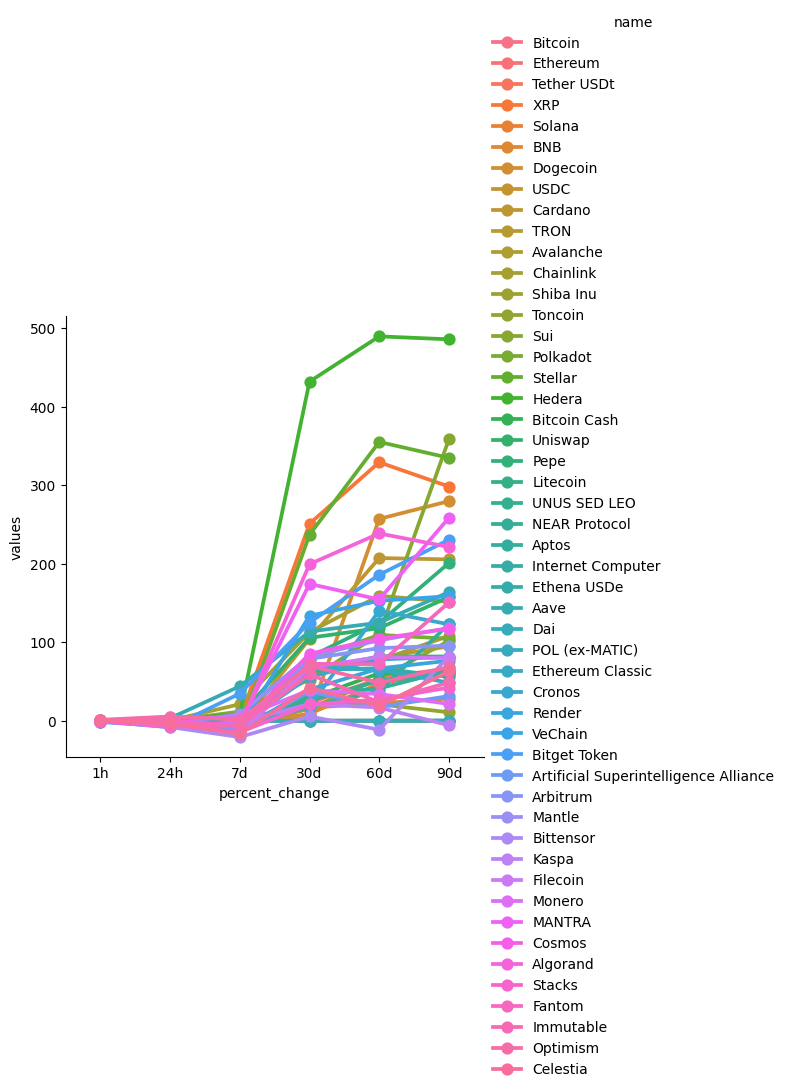

In [76]:
sns.catplot(x=df8['percent_change'], y=df8['values'], hue=df8['name'], kind='point')

In [82]:
df9 = df8[['name','percent_change','values']]
df9 = df8.query("name == 'Bitcoin'")
df9

,name,percent_change,values
0,Bitcoin,1h,-0.09193
1,Bitcoin,24h,-0.80894
2,Bitcoin,7d,2.15266
3,Bitcoin,30d,14.47625
4,Bitcoin,60d,54.54825
5,Bitcoin,90d,66.72248


In [90]:
import matplotlib.pyplot as plt

#### plt.axhline adjust the x axis

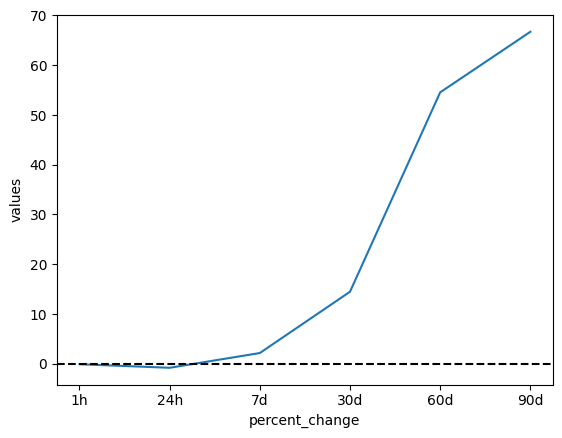

In [91]:
sns.lineplot(x='percent_change', y='values', data=df9)
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)